In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
column_names = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
data = pd.read_csv("data.csv",sep=",",names=column_names)

In [ ]:
# Requirement 1
# Qualitative variable distribution table
gender_quantity = data['Sex'].value_counts().reset_index()
gender_quantity.columns = [' ', 'count']

total_snails = gender_quantity['count'].sum()
gender_quantity['%'] = (gender_quantity['count'] / total_snails) * 100
gender_quantity['%'] = gender_quantity['%'].round(2)
category_counts = gender_quantity.sort_values(by=' ')

gender_quantity[' '] = gender_quantity[' '].replace({'M': 'Male', 'I': 'Infant', 'F': 'Female'})

gender_quantity.set_index(' ', inplace=True)
print(gender_quantity)

In [ ]:
# Requirement 2
# Summary statistics for the quantitative variables table
data_rows = []

for variable in column_names[1:]:
    name = variable
    mean = data[variable].mean()
    std = data[variable].std()
    minimum = data[variable].min()
    q1 = data[variable].quantile(0.25)
    median = data[variable].median()
    q3 = data[variable].quantile(0.75)
    maximum = data[variable].max()
    data_rows.append([name, mean, std, minimum, q1, median, q3, maximum])

summary_stats = pd.DataFrame(data_rows, columns=[' ', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

summary_stats.set_index(' ', inplace=True)
print(summary_stats)

In [ ]:
# Requirement 3
# Bar chart of the counts of occurrences of each category for the qualitative variable
sns.countplot(data=data, x='Sex')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

In [ ]:
# Requirement 4
# Histogram of each quantitative variable
fig, plots_req4 = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.75)

# A variable to keep track of subplots
i = 0
for variable in column_names[1:]:
    row = i // 2
    col = i % 2
    plots_req4[row, col].hist(data[variable], bins=20, edgecolor='yellow', color='black')
    plots_req4[row, col].set_title(f'Histogram of {variable}')
    plots_req4[row, col].set_xlabel(variable)
    plots_req4[row, col].set_ylabel('Frequency')
    i += 1
plt.show()

In [ ]:
# Requirement 5
# Scatter plot for each pair of the quantitative variables
fig, plots_req5 = plt.subplots(14, 2, figsize=(12, 50))
fig.subplots_adjust(hspace=0.75)

# Determines the second variable in each pair
p = 2
# A variable to keep track of subplots
i = 0
for variable in column_names[1:]:
    for variable2 in column_names[p:]:
        row = i // 2
        col = i % 2
        plots_req5[row, col].scatter(data[variable], data[variable2], color='yellow')
        plots_req5[row, col].set_title(f'Scatter plot of {variable} to {variable2}')
        plots_req5[row, col].set_xlabel(variable)
        plots_req5[row, col].set_ylabel(variable2)
        i += 1
    p += 1
plt.show()

In [ ]:
# Requirement 6
# Linear correlation matrix of all quantitative variables table 
correlation_matrix = data[column_names[1:]].corr()
display(correlation_matrix)

In [ ]:
# Requirement 7
# Heatmap representing a linear correlation matrix of all quantitative variables
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title("Correlation matrix heatmap")
plt.show()

In [ ]:
# Requirement 8
# Linear regression plot with the two quantitative variables that are most strongly linearly correlated
# sns.regplot(data=data, x='length', y='diameter', color='yellow')
# plt.title("linear regression")
# plt.show()

# to mnie zastanawia bo powinniosmy najpierw dynamicznie chyba sprawdzic co ma najwieksza korelacje
# ale wychodzi troche inny wykres wtedy
strongest_correlation = correlation_matrix.abs().stack().sort_values(ascending=False)
strongest_correlation = strongest_correlation[strongest_correlation != 1]
variable, variable2 = strongest_correlation.index[0]

sns.regplot(data=data, x=variable, y=variable2, color='yellow')
plt.title("Linear regression plot")
plt.show()

In [ ]:
# Requirement for grade 5
# Summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable table
data['Sex'] = data['Sex'].replace({'M': 'Male', 'I': 'Infant', 'F': 'Female'})
sex_order = ['Female', 'Infant', 'Male']

summary_stats = []
unique_features = set()

for variable in column_names[1:]:
    name = variable
    
    for category in sex_order:
        category_data = data[data['Sex'] == category]
        
        sex = category
        mean = category_data[variable].mean()
        std = category_data[variable].std()
        minimum = category_data[variable].min()
        q1 = category_data[variable].quantile(0.25)
        median = category_data[variable].median()
        q3 = category_data[variable].quantile(0.75)
        maximum = category_data[variable].max()
        
        if variable not in unique_features:
            unique_features.add(variable)
        else:
            name = ''
        
        summary_stats.append([name, sex, mean, std, minimum, q1, median, q3, maximum])
        
summary_stats_df = pd.DataFrame(summary_stats, columns=['Feature', 'Sex', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

display(summary_stats_df)

C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jstep\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

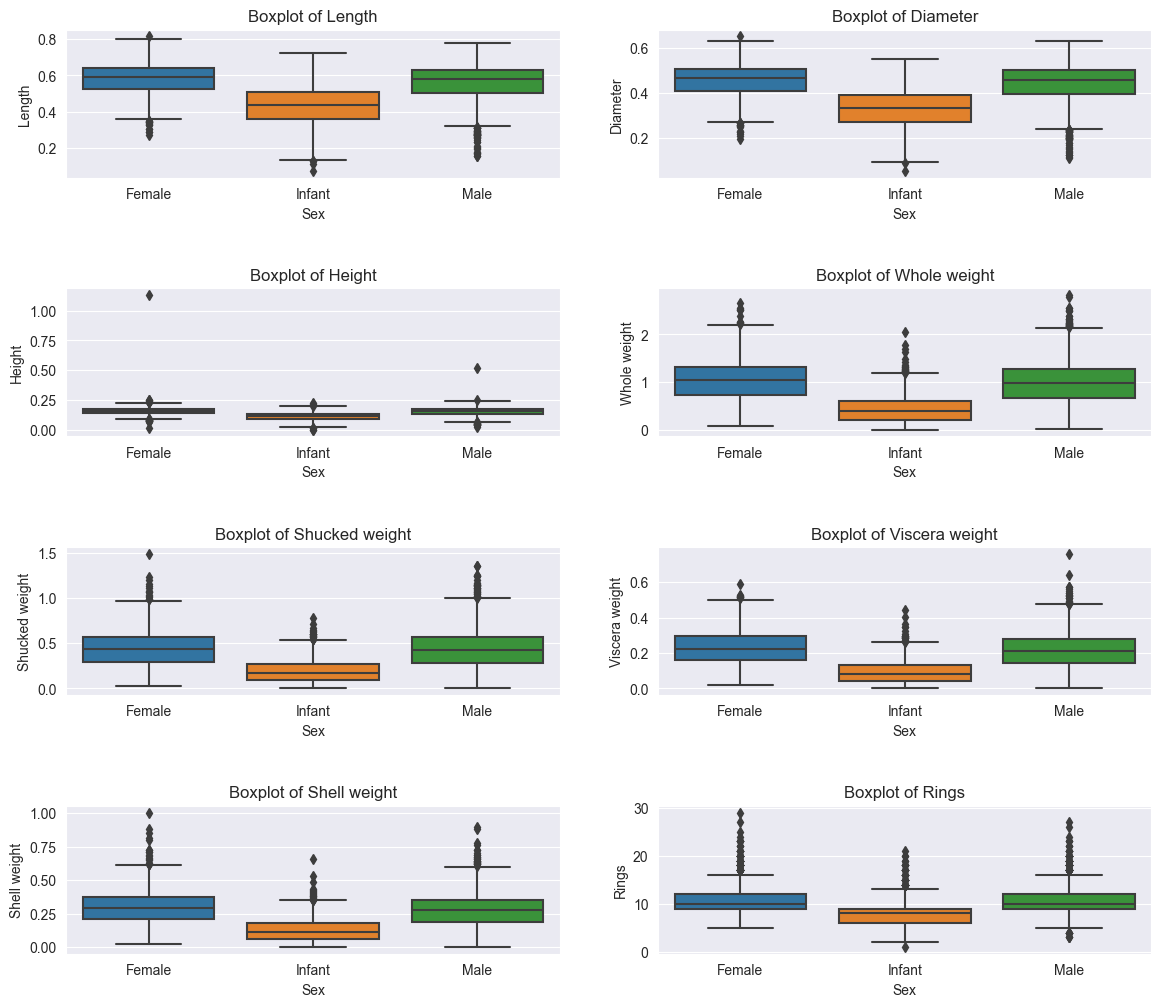

In [31]:
data['Sex'] = data['Sex'].replace({'M': 'Male', 'I': 'Infant', 'F': 'Female'})
fig, box_plots = plt.subplots(4, 2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.75)
i = 0
for var in column_names[1:]:
    row = i // 2
    col = i % 2
    sns.boxplot(data=data, x='Sex', y=var, order=sex_order, ax=box_plots[row, col])
    box_plots[row, col].set_title(f'Boxplot of {var}')
    box_plots[row, col].set_xlabel("Sex")
    box_plots[row, col].set_ylabel(var)
    i = i + 1
plt.show()